In [1]:
import unet
import losses
import engine
import torch
import json
import unet2d 
from torch import nn


class NeuralNetwork(unet2d.UNET,engine.Engine):
    def __init__(self):
        engine.Engine.__init__(self)
        unet2d.UNET.__init__(self)


with open('../config/configs.json') as f:
    config = json.load(f)

model=NeuralNetwork()
model.compile(loss= nn.BCEWithLogitsLoss(), optimizer= torch.optim.Adam(model.parameters(),lr=config['optimizer']['learning_rate']), metrics=['dice_score','loss'])
print("Compile Status")
print("-------------------------------")
model.compile_status()


model.load_data(dataset_path=config['dataset']['Barbary'],transformation_flag=True,transformation=config['transformation_size'],batchsize=config['batch_size'],test_valid_split=0)
print("\nData Status")
print("-------------------------------")
model.data_status()

print("\nTesting")
print("-------------------------------")
model.evaluate_train2d() #evaluation on one input with transformation [64,256,256] took 2 minutes


print("\nTraining")
print("-------------------------------")
model.fit2d(epochs=config['epochs']) #one epoch on one input with transformation [64,256,256] took 7 minutes

print("\nTesting")
print("-------------------------------")
model.evaluate_train2d() #evaluation on one input with transformation [64,256,256] took 2 minutes


c:\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Compile Status
-------------------------------
Loss= BCEWithLogitsLoss() 

Optimizer= Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0
) 

Metrics= ['dice_score', 'loss'] 


Data Status
-------------------------------
Batch Shape of Training Features: (1, 1, 32, 32, 8) torch.float32
Batch Shape of Training Labels: (1, 1, 32, 32, 8) torch.float32

Testing
-------------------------------
Slice: 0/8
Slice: 1/8
Slice: 2/8
Slice: 3/8
Slice: 4/8
Slice: 5/8
Slice: 6/8
Slice: 7/8
Total Loss: 1.2164663076400757

Training
-------------------------------
Epoch 1
-------------------------------
Slice: 0/8
Slice: 1/8
Slice: 2/8
Slice: 3/8
Slice: 4/8
Slice: 5/8
Slice: 6/8
Slice: 7/8
3D Loss: 0.02719265818595886
Epoch 2
-------------------------------
Slice: 0/8
Slice: 1/8
Slice: 2/8
Slice: 3/8
Slice: 4/8
Slice: 5/8
Slice: 6/8
Slice: 7/8
3D Loss: 0.022898370027542116
Epoch 3


Prediction
-------------------------------
Slice: 0/8
Slice: 1/8
Slice: 2/8
Slice: 3/8
Slice: 4/8
Slice: 5/8
Slice: 6/8
Slice: 7/8


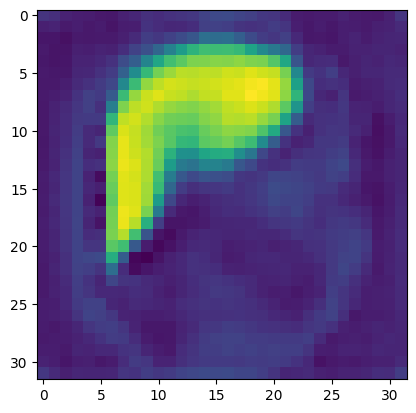

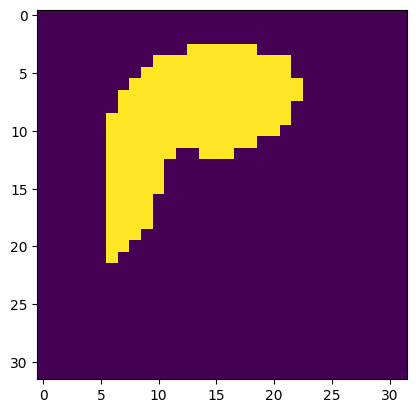

2022-11-16 23:47:08,732 - Animation.save using <class 'matplotlib.animation.PillowWriter'>
(1, 1, 1, 32, 32, 8)


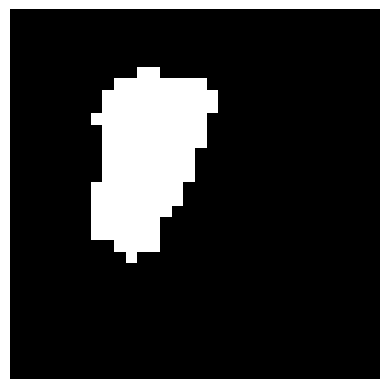

In [2]:
import torch

print("\nPrediction")
print("-------------------------------")
ImagePath=config['PredictPath']
# Image=torch.asarray(nib.load(ImagePath).get_fdata())
output=model.pred2d(ImagePath)
print(output.shape)

In [3]:
import numpy as np
import nibabel as nib

ni_img = nib.Nifti1Image(np.asarray(output[0][0][0]), affine=np.eye(4))
nib.save(ni_img, "nifti_prediction.nii")